In [440]:
import pandas as pd
#import sqlite3
#pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
import seaborn as sns

titanic_data = pd.read_csv('train.csv', index_col = 'PassengerId')

SURVIVED_COL = 'Survived'
NAME_COL = 'Name'
SEX_COL = 'Sex'
CLASS_COL = 'Pclass'
AGE_COL = 'Age'
SIBSP_COL= 'SibSp'
PARCH_COL = 'Parch'
TICKET_COL ='Ticket'
PRICE_COL = 'Fare'
CABIN_COL = 'Cabin'
PORT_COL = 'Embarked'
STATUS_COL = 'Status'

column_names = titanic_data.columns
DATA_LEN = len(titanic_data)

# Context

In [441]:
titanic_data.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Columns meaning
* Name: Name of passenger
* Survival: is or not survived(0 = No, 1 = Yes)
* Pclass: Ticket class(1 = 1st, 2 = 2nd, 3 = 3rd)
* Sex: Sex
* Age: Age in years
* Sibsp: count of siblings / spouses aboard the Titanic (brother, sister, stepbrother, stepsister; husband, wife (mistresses and fiancés were ignored))
* Parch: count of parents / children aboard the Titanic (Some children travelled only with a nanny, therefore parch=0 for them)
* Ticket: Ticket number
* Fare: Ticket Price
* Cabin: Cabin number
* Embarked: Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

In [442]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


<AxesSubplot:ylabel='Survived'>

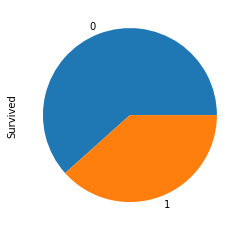

In [443]:
titanic_data[SURVIVED_COL].value_counts().plot.pie()

<AxesSubplot:ylabel='Sex'>

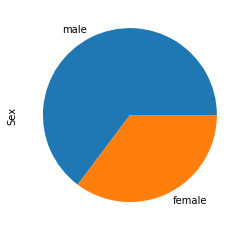

In [444]:
titanic_data[SEX_COL].value_counts().plot.pie()

Text(0.5, 1.0, 'Age')

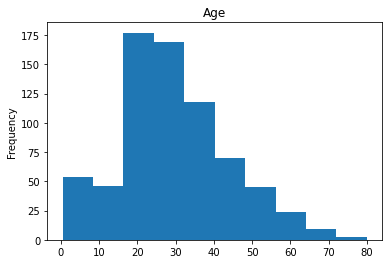

In [445]:
titanic_data[AGE_COL].plot(kind='hist', xlabel='Age').set_title('Age')

Text(0.5, 1.0, 'Ticket price')

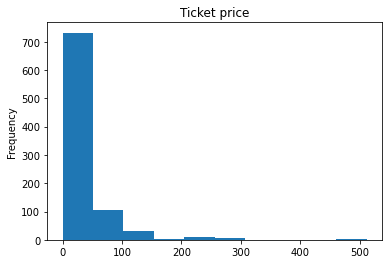

In [446]:
titanic_data[PRICE_COL].plot(kind='hist').set_title('Ticket price')

<AxesSubplot:ylabel='Embarked'>

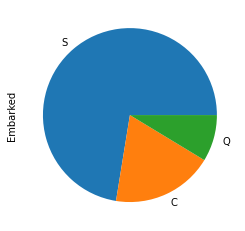

In [447]:
titanic_data[PORT_COL].value_counts().plot.pie()

<AxesSubplot:ylabel='Pclass'>

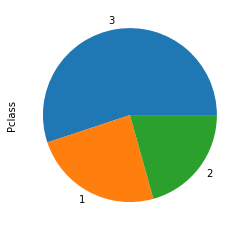

In [448]:
titanic_data[CLASS_COL].value_counts().plot.pie()

Text(0.5, 1.0, 'Siblings/Sproud abroad')

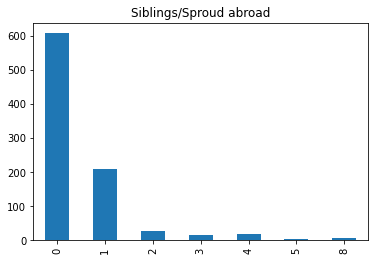

In [449]:
titanic_data[SIBSP_COL].value_counts().sort_index().plot(kind='bar').set_title('Siblings/Sproud abroad')

Text(0.5, 1.0, 'Parents/Childs abroad')

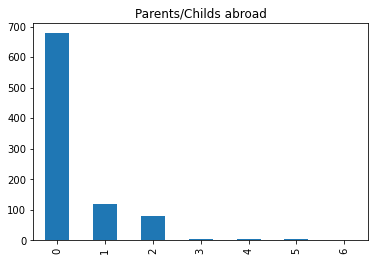

In [450]:
titanic_data[PARCH_COL].value_counts().sort_index().plot(kind='bar').set_title('Parents/Childs abroad')

Passanger names include the person status, that could be usefull for data analysis:

Text(0.5, 1.0, 'Status')

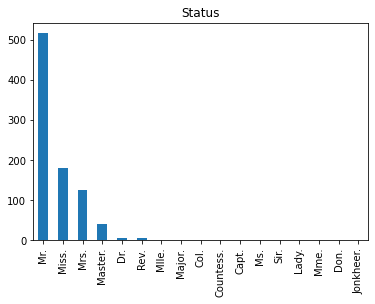

In [451]:
names_seria = titanic_data[NAME_COL].copy()
for i in range(len(titanic_data)):
    name = names_seria.iloc[i]    
    names_seria.iloc[i] = name[name.find(',')+1:].split()[0]
titanic_data['Status'] = names_seria
index_of_the = titanic_data[titanic_data[STATUS_COL]=='the'].index[0]-1 #replacing the exception situation with the Countess.
titanic_data.iat[index_of_the, 11] = 'Countess.'

titanic_data[STATUS_COL].value_counts().plot(kind='bar').set_title('Status')

On the moment of Titanic crash(11:40 pm), a lot of passengers should be in the cabins, that conditions the value of cabin information: 
https://habrastorage.org/r/w1560/files/ddf/307/0c6/ddf3070c69e0450184e35790f72917d1.jpeg
The higher cabin should mean higher chanse of Survive.

# Data quality assessment

In [452]:
titanic_data[titanic_data[NAME_COL].duplicated()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Status
PassengerId,,,,,,,,,,,,


No duplicated found

In [453]:
print('Columns with Nans:')
for c in range(len(column_names)):
    if titanic_data[column_names[c]].hasnans:
        print (column_names[c])
        print (str(len(titanic_data[titanic_data[column_names[c]].isna()]) / DATA_LEN *100) + '% of Nans')

Columns with Nans:
Age
19.865319865319865% of Nans
Cabin
77.10437710437711% of Nans
Embarked
0.22446689113355783% of Nans


Age gaps need to be replaced with the mean of person status

In [454]:
list_of_statuses = titanic_data[STATUS_COL].unique()
for i in range(len(list_of_statuses)):
    status = list_of_statuses[i]
    mean = titanic_data[titanic_data[STATUS_COL] == status][AGE_COL].dropna().mean()
    mean = round(mean*2)/2
    titanic_data[titanic_data[STATUS_COL] == status] = titanic_data[titanic_data[STATUS_COL] == status].fillna({AGE_COL:mean})
    
print('Age column has Nans:' + str(titanic_data[AGE_COL].hasnans))

Age column has Nans:False


Because of possible great importance of cabin information, we don't drop this column, though data is 77% missing.

In [455]:
titanic_data[CABIN_COL].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In cabin T was living only one man, according to info from Encyclopedia Titanic, so it can be deleted.
For others change we value just to the first letter to make the data easy to analyse. And fill the Nans.

In [456]:
titanic_data.at[titanic_data[CABIN_COL].notna(),CABIN_COL] = titanic_data[titanic_data[CABIN_COL].notna()][CABIN_COL].apply(lambda x : x[0:1])
titanic_data[CABIN_COL] = titanic_data[CABIN_COL].fillna('NO INFO')
titanic_data.at[titanic_data[CABIN_COL] == 'T',CABIN_COL] = 'NO INFO'
sorted(titanic_data[CABIN_COL].unique())

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'NO INFO']

Embarked Port is missing only in two rows, so fill we just with the most popular - S

In [457]:
titanic_data[PORT_COL] = titanic_data[PORT_COL].fillna('S')

There are ticket prices equal to 0, that must be an error. Fill we zeros with the mean of class price. 

In [458]:
for cl in range(3):
    mask = titanic_data[CLASS_COL]==(cl+1)
    mean_price = titanic_data.loc[mask][PRICE_COL].mean()
    mask = mask & (titanic_data[PRICE_COL]==0)
    titanic_data.loc[mask,PRICE_COL] = mean_price

Now the plot look like this:

Text(0.5, 1.0, 'Ticket price')

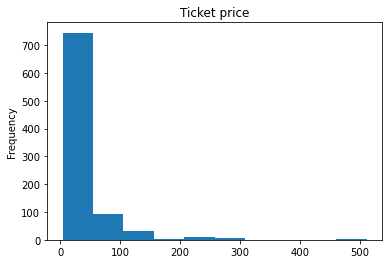

In [459]:
titanic_data[PRICE_COL].plot(kind='hist').set_title('Ticket price')

# Data exploration

In [460]:
#create a function that show the distribution of survived and not survived by the feature
def bar_survive(feature):
    survived = titanic_data[titanic_data[SURVIVED_COL]==1][feature].value_counts()
    dead = titanic_data[titanic_data[SURVIVED_COL]==0][feature].value_counts()
    if ("NO INFO" in survived.index):
        survived = survived.drop(index='NO INFO')
    if ("NO INFO" in dead.index):
        dead = dead.drop(index='NO INFO')
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind ='bar',stacked='True')

In [461]:
#the same with class
def bar_class(feature):
    first = titanic_data[titanic_data[CLASS_COL]==1][feature].value_counts()
    second = titanic_data[titanic_data[CLASS_COL]==2][feature].value_counts()
    third = titanic_data[titanic_data[CLASS_COL]==3][feature].value_counts()
    df = pd.DataFrame([first, second,third])
    df.index = ['First','Second','Third']
    df.plot(kind ='bar',stacked='True')

<AxesSubplot:>

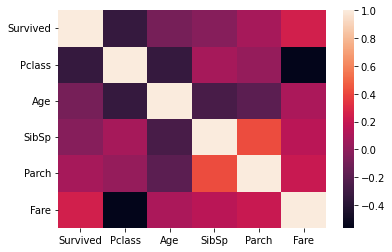

In [462]:
sns.heatmap(titanic_data.corr())

The first strong correlation with survive chance is PClass.

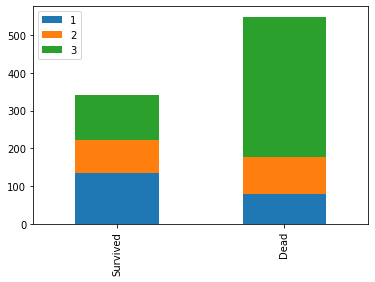

In [463]:
bar_survive(CLASS_COL)

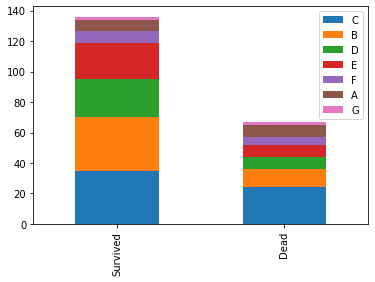

In [468]:
bar_survive(CABIN_COL)

We can also see, that the fact of existing of cabin information increases the survive chance.
But this fact correlates with PClass:

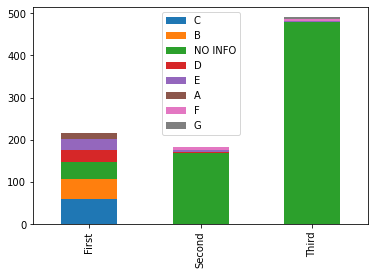

In [465]:
bar_class(CABIN_COL)

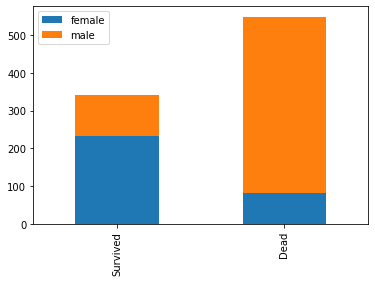

In [466]:
bar_survive(SEX_COL)

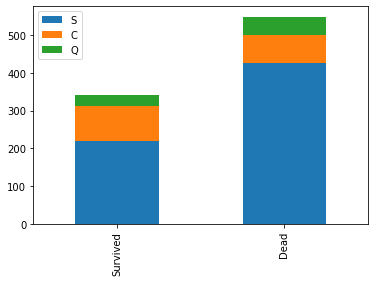

In [467]:
bar_survive(PORT_COL)

### Summary

The most important factors of survive are:
* female survived more than male
* 3rd class increases chance of dead, 1st - of survive
